# Pandas

* Standardalias `pd`
* erlaubt Datenzugriff auf verschiedenste Arten
* neue Datentypen:
    * `Series` - 1D array mit Index (Excel-Spalte)
    * `DataFrame` - 2D array mit Index (Excel-Spreadsheet)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
series = pd.Series(data=[1,2,3,4], index=['a', 'b', 'c', 'd'])
print(series, series['a'], sep='\n')

a    1
b    2
c    3
d    4
dtype: int64
1


In [10]:
htl_if = {'Room': ['N312', 'N313', 'N304', 'N317'],
          'KV': ['SCRE', 'WISS', 'NEUL', 'BUCH'],
          'Size': [23, 22, 19, 25]}
dataframe = pd.DataFrame(data=htl_if, index=['4AHIF', '4BHIF', '5AHIF', '5BHIF'])
dataframe

,Room,KV,Size
4AHIF,N312,SCRE,23
4BHIF,N313,WISS,22
5AHIF,N304,NEUL,19
5BHIF,N317,BUCH,25


### Einlesen

* über die zahlreichen `readXXX`-Methoden
* Viele Optionen, wie Beispielsweise
    * Delimiter
    * Kommaformat
    * `""/''` Escaping

In [3]:
energy = pd.read_csv('./data/owid-energy-data.csv')
energy.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17432 entries, 0 to 17431
Data columns (total 122 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    iso_code                                 object 
 1    country                                  object 
 2    year                                     int64  
 3    coal_prod_change_pct                     float64
 4    coal_prod_change_twh                     float64
 5    gas_prod_change_pct                      float64
 6    gas_prod_change_twh                      float64
 7    oil_prod_change_pct                      float64
 8    oil_prod_change_twh                      float64
 9    energy_cons_change_pct                   float64
 10   energy_cons_change_twh                   float64
 11   biofuel_share_elec                       float64
 12   biofuel_elec_per_capita                  float64
 13   biofuel_cons_change_pct                  float64
 14   biof

### Selection

In [7]:
countries = energy.country
isos_countries = energy['iso_code']

In [16]:
austria = energy[energy['iso_code'] == 'AUT']
germany = energy.query('iso_code == "DEU"')
austria

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
1039,AUT,Austria,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.864771e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040,AUT,Austria,1901,5.607,9.674,NaN,0.0,NaN,0.000,NaN,...,NaN,NaN,1.872057e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1041,AUT,Austria,1902,-3.808,-6.937,NaN,0.0,NaN,0.012,NaN,...,NaN,NaN,1.945581e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,AUT,Austria,1903,2.144,3.757,NaN,0.0,0.0,0.000,NaN,...,NaN,NaN,1.963850e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043,AUT,Austria,1904,1.317,2.357,NaN,0.0,0.0,0.000,NaN,...,NaN,NaN,1.994206e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,AUT,Austria,2016,0.000,NaN,0.0,NaN,0.0,NaN,3.308,...,125.302,315.109,3.950000e+11,8.022,7.510,3.309,0.920,13.165,598.472,1505.035
1156,AUT,Austria,2017,0.000,NaN,0.0,NaN,0.0,NaN,2.391,...,143.874,359.686,NaN,9.746,24.796,4.033,3.264,16.429,745.069,1862.675
1157,AUT,Austria,2018,0.000,NaN,0.0,NaN,0.0,NaN,-1.984,...,161.696,401.877,NaN,9.277,-8.770,3.754,-1.441,14.988,678.262,1685.741
1158,AUT,Austria,2019,0.000,NaN,0.0,NaN,0.0,NaN,4.350,...,151.056,373.735,NaN,10.611,22.845,4.419,3.424,18.412,848.714,2056.042


* `loc` operiert auf Zeilen/Spaltennummern
* `iloc` operiert auf Indizespositionen

In [7]:
head = energy.iloc[-3:, :3]
head

,iso_code,country,year
17429,ZWE,Zimbabwe,2017
17430,ZWE,Zimbabwe,2018
17431,ZWE,Zimbabwe,2019


In [8]:
head_country_and_pop = energy.loc[:3, ['iso_code', 'population']]
head_country_and_pop

,iso_code,population
0,AFG,5021241.0
1,AFG,5053439.0
2,AFG,5085403.0
3,AFG,5118005.0


In [9]:
austria.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 1039 to 1159
Data columns (total 122 columns):
 #    Column                                   Non-Null Count  Dtype  
---   ------                                   --------------  -----  
 0    iso_code                                 121 non-null    object 
 1    country                                  121 non-null    object 
 2    year                                     121 non-null    int64  
 3    coal_prod_change_pct                     119 non-null    float64
 4    coal_prod_change_twh                     64 non-null     float64
 5    gas_prod_change_pct                      73 non-null     float64
 6    gas_prod_change_twh                      64 non-null     float64
 7    oil_prod_change_pct                      100 non-null    float64
 8    oil_prod_change_twh                      64 non-null     float64
 9    energy_cons_change_pct                   54 non-null     float64
 10   energy_cons_change_twh          

<ipython-input-9-b2dde480c012>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  austria.info(null_counts=True, verbose=True)


<AxesSubplot:>

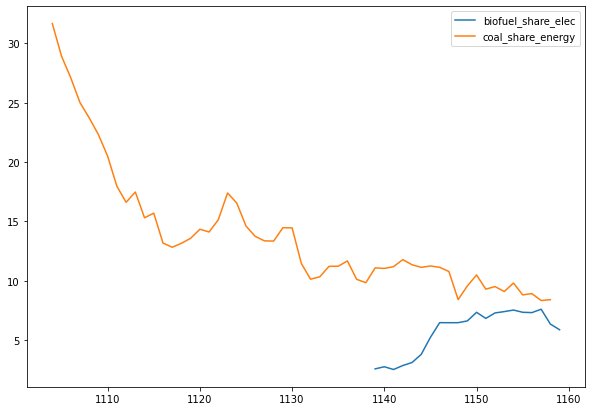

In [23]:
plt.rcParams['figure.figsize'] = (10,7)
#sns.lineplot(data=austria, x='year', y='gdp')
#sns.lineplot(data=austria, x='year', y='gdp')
austria.loc[:,['biofuel_share_elec',"coal_share_energy"]].plot()

<AxesSubplot:xlabel='year', ylabel='gdp'>

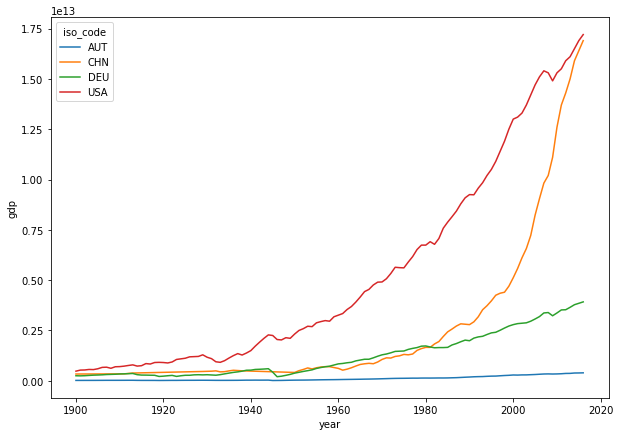

In [11]:
interesting_countries = energy[energy['iso_code'].isin(('AUT', 'DEU', 'CHN', 'USA'))]
sns.lineplot(data=interesting_countries, x='year', y='gdp', hue='iso_code')
#sns.lineplot(data=interesting_countries, x='year', y='renewables_share_elec', hue='iso_code')

<AxesSubplot:xlabel='year'>

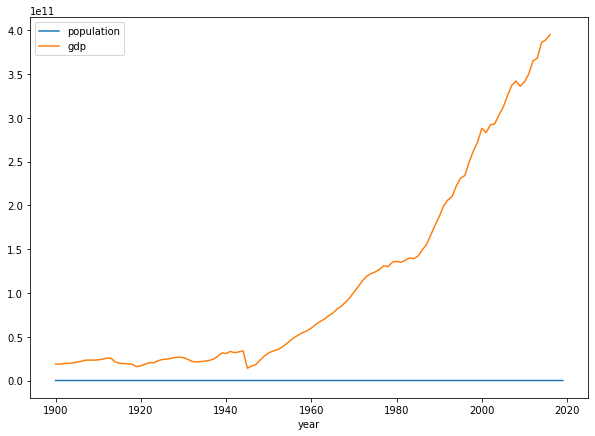

In [12]:
austria.plot(x='year', y=['population', 'gdp'])

<AxesSubplot:xlabel='year'>

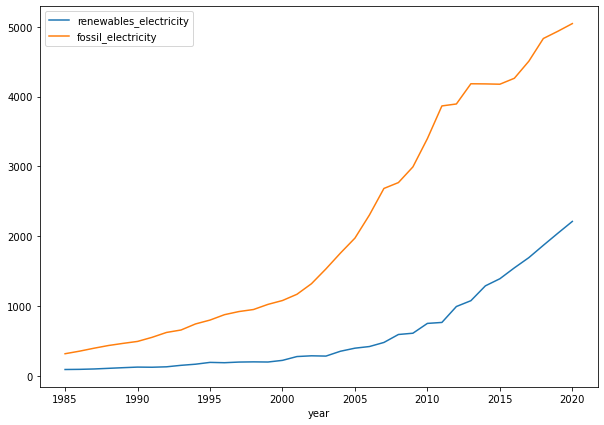

In [13]:
china = energy[energy['iso_code'].isin(('CHN', ))]
china.plot(x='year', y=['renewables_electricity','fossil_electricity',])

In [36]:
energy['iso_code'] = energy.iso_code.apply(prefix_iso)

In [34]:
def prefix_iso(country):
    return f'ISO: {country}'

In [42]:
energy.plot.hist()

AttributeError: 'DataFrame' object has no attribute 'renewables_electricity_share'

### Missing Data

* Daten fehlen oft
* entfernen(Zeilen oder Spalten) oder ergänzen

In [14]:
data = pd.DataFrame({'a': [1, 2, np.nan], 'b': [3, np.nan, np.nan
], 'c': [1,2,3]})
data

,a,b,c
0,1.0,3.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [15]:
data.dropna(axis=0, inplace=False, thresh=None)

,a,b,c
0,1.0,3.0,1


* `axis`: 0 - zeilenweise, 1 - spaltenweise
* `inplace`: Funktion returnt `None` und modifiziert übergebenes Objekt
* `thresh`old: Anzahl nicht-`NaN` Werte, die vorhanden sein müssen

In [16]:
austria_nuclear = austria['nuclear_share_elec']
austria_nuclear

1039    NaN
1040    NaN
1041    NaN
1042    NaN
1043    NaN
       ... 
1155    0.0
1156    0.0
1157    0.0
1158    0.0
1159    0.0
Name: nuclear_share_elec, Length: 121, dtype: float64

In [17]:
#data = data.fillna(value='former NaN')
data['a'].fillna(value=data['a'].mean(), inplace=True)
data

,a,b,c
0,1.0,3.0,1
1,2.0,NaN,2
2,1.5,NaN,3


In [18]:
data = pd.DataFrame({'Category':['A','B','C']*3,
                     'Value':[20, np.nan, 40, np.nan, 10, 20, 30, np.nan, 50]})
data

,Category,Value
0,A,20.0
1,B,NaN
2,C,40.0
3,A,NaN
4,B,10.0
5,C,20.0
6,A,30.0
7,B,NaN
8,C,50.0


In [19]:
print(data.groupby('Category')['Value'].mean())
data['Value'] = data.groupby('Category')['Value'].apply(lambda x: x.fillna(x.mean()))
data.sort_values('Category')

Category
A    25.000000
B    10.000000
C    36.666667
Name: Value, dtype: float64


,Category,Value
0,A,20.0
3,A,25.0
6,A,30.0
1,B,10.0
4,B,10.0
7,B,10.0
2,C,40.0
5,C,20.0
8,C,50.0


### Hinzufügen/Entfernen von Zeilen/Spalten

In [21]:
print(dataframe)
if_rooms_with_kv = dataframe.drop(columns='Size')
if_rooms_with_kv

       Room    KV  Size
4AHIF  N312  SCRE    23
4BHIF  N313  WISS    22
5AHIF  N304  NEUL    19
5BHIF  N317  BUCH    25


,Room,KV
4AHIF,N312,SCRE
4BHIF,N313,WISS
5AHIF,N304,NEUL
5BHIF,N317,BUCH


In [24]:
series_has_books = pd.Series([True, False, False, True], index=['4AHIF', '4BHIF', '5AHIF', '5BHIF'], name='Has books')
series_has_books
IF = pd.concat([dataframe, series_has_books], axis=1)

In [25]:
IF

,Room,KV,Size,Has books
4AHIF,N312,SCRE,23,True
4BHIF,N313,WISS,22,False
5AHIF,N304,NEUL,19,False
5BHIF,N317,BUCH,25,True


## One Hot Encoding

In [35]:
pd.get_dummies(IF, columns=['Room', 'KV'], drop_first=True)

,Size,Has books,Room_N312,Room_N313,Room_N317,KV_NEUL,KV_SCRE,KV_WISS
4AHIF,23,True,1,0,0,0,1,0
4BHIF,22,False,0,1,0,0,0,1
5AHIF,19,False,0,0,0,1,0,0
5BHIF,25,True,0,0,1,0,0,0
